
[INFO] Results for image: IMG_3609.PNG
    Face 85: anh
    Face 93: anh
    Face 93: anh
    Face 93: anh
    Face 84: anh
    Face 75: anh


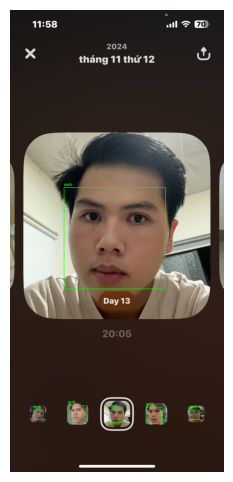


[INFO] Results for image: IMG_3614.PNG
    Face 92: anh
    Face 92: anh
    Face 93: anh
    Face 93: anh


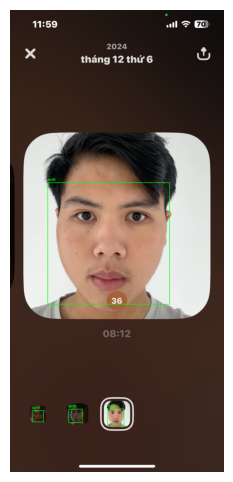


[INFO] Results for image: IMG_3610.PNG
    Face 93: anh
    Face 93: anh
    Face 94: anh
    Face 93: anh
    Face 85: anh


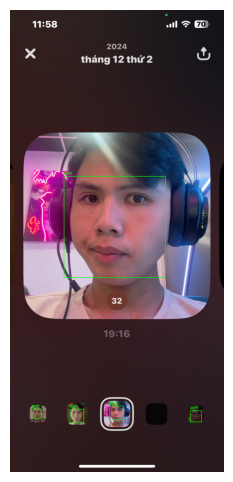


[INFO] Done!


In [2]:
import cv2
import face_recognition
import pickle
import os
import matplotlib.pyplot as plt

ENCODINGS_PATH = "encoding.pickle"
TEST_IMAGES_DIR = "test_images"

# Load encodings
data = pickle.load(open(ENCODINGS_PATH, "rb"))

# Lặp qua tất cả ảnh trong thư mục
for img_name in os.listdir(TEST_IMAGES_DIR):
    img_path = os.path.join(TEST_IMAGES_DIR, img_name)

    # Đọc và xử lý ảnh
    image = cv2.imread(img_path)
    if image is None:
        print(f"[WARNING] Cannot load {img_path}. Skipping...")
        continue

    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces
    boxes = face_recognition.face_locations(rgb, model="hog")
    encodings = face_recognition.face_encodings(rgb, boxes)

    print(f"\n[INFO] Results for image: {img_name}")
    if not encodings:
        print("[INFO] No faces detected.")
        continue

    # Vẽ hộp và tên lên ảnh
    for (i, (box, encoding)) in enumerate(zip(boxes, encodings)):
        matches = face_recognition.compare_faces(data["encodings"], encoding, tolerance=0.4)
        name = "Unknown"

        if True in matches:
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]
            counts = {}

            for i in matchedIdxs:
                name = data["names"][i]
                counts[name] = counts.get(name, 0) + 1

            name = max(counts, key=counts.get)

        # Vẽ hộp bao quanh mặt và tên
        top, right, bottom, left = box
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

        print(f"    Face {i+1}: {name}")

    # Chuyển đổi ảnh từ BGR sang RGB và hiển thị trong Jupyter Notebook
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')  # Tắt trục
    plt.show()

print("\n[INFO] Done!")
